In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\excelr assignments\knn\Zoo.csv")

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


<AxesSubplot:xlabel='type', ylabel='count'>

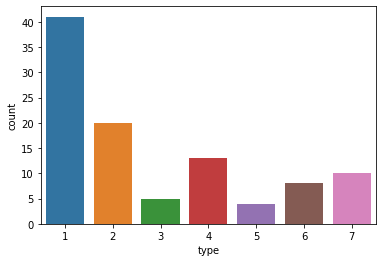

In [4]:
sns.countplot(x='type',data=df)

In [ ]:
#Most of animals available in Zoo are of Type 1 followed by 2, 4 and 7 respectively

<AxesSubplot:>

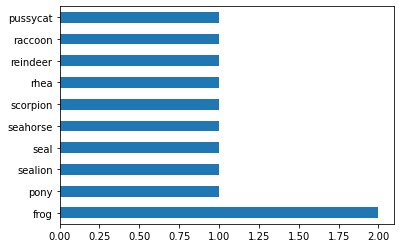

In [6]:
df['animal name'].value_counts()[:10].plot(kind='barh')

In [8]:
len(df['animal name'].unique())

100

In [9]:
df.shape

(101, 18)

In [10]:
#All the animals available in the zoo are unique and in 1 number expect frog

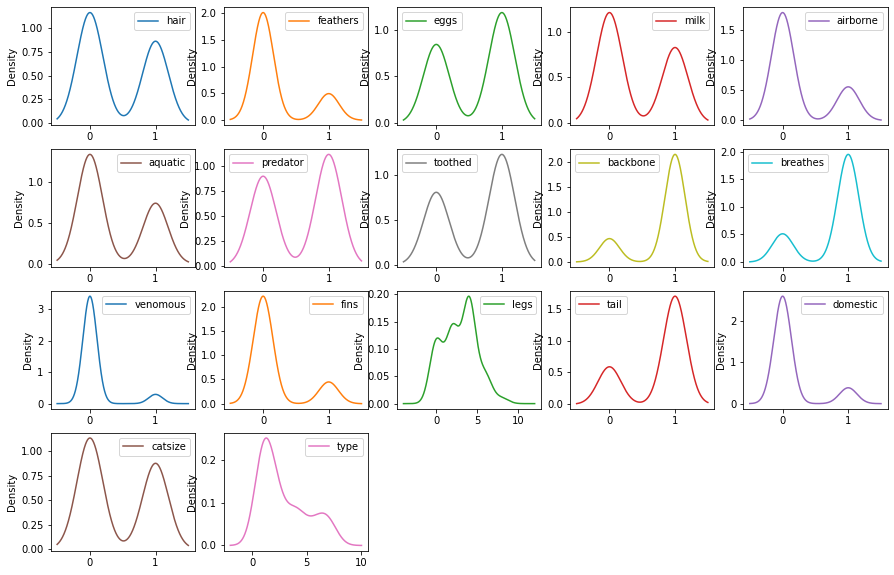

In [18]:
df.plot(kind='kde',subplots=True, layout=(4,5), figsize=(15,10), sharex=False, sharey=False)
plt.show()

#majority of the variables are evenly distributed amongst the animals. However some of the variables like feathers,airbone, backbone, breathes, venomous, fins, tail and domestic is not evenly distributed.Majority of them either have these indicated by 1 or 0 indicating their absence

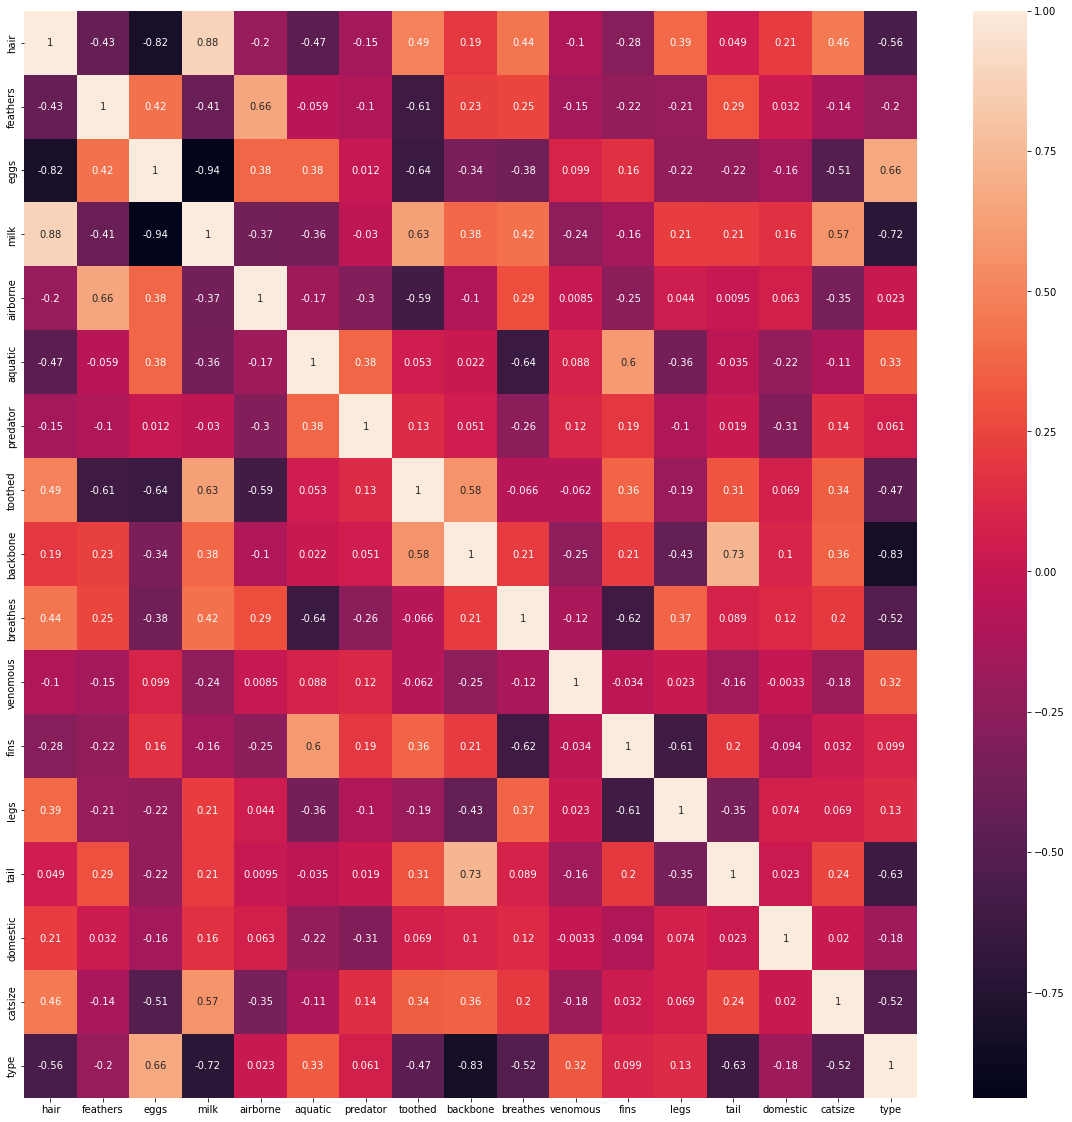

In [20]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

In [21]:
#features like tail and backbone,milk adn hair are highly positively correlated

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [25]:
x = df.drop(['animal name','type'],axis=1)
y = df['type']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [28]:
knn = KNeighborsClassifier()

In [29]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
pred = knn.predict(x_test)

In [32]:
accuracy_score(y_test,pred)

0.7692307692307693

In [33]:
confusion_matrix(y_test,pred)

array([[9, 0, 0, 1, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 1, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 1, 1, 1]], dtype=int64)

In [34]:
from sklearn.model_selection import GridSearchCV

In [46]:
params = {'n_neighbors':[i for i in range(3,51)],'p':[1,2],'metric':['euclidean','minkowski','manhattan']}

In [47]:
gscv = GridSearchCV(knn,params,scoring='accuracy',cv=5)

In [48]:
gscv.fit(x_train,y_train)

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'p': [1, 2]},
             scoring='accuracy')

In [49]:
gscv.best_params_

{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1}

In [50]:
gscv.best_score_

0.9733333333333334

In [72]:
knn1 = KNeighborsClassifier(n_neighbors=3,p=1)

In [73]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [74]:
pred1 = knn1.predict(x_test)

In [75]:
accuracy_score(y_test,pred1)

0.8846153846153846

In [76]:
#by using n_neighbors=3 and p=1 accuracy score increased from 76.9% to 88.4%

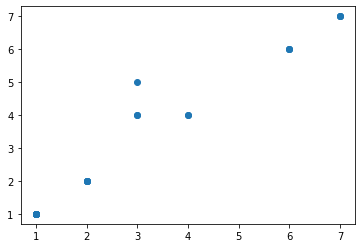

In [77]:
plt.scatter(y_test,pred1)